用1层隐藏层的神经网络分类二维数据
欢迎来到第3周的编程作业。 现在是时候建立你的第一个神经网络了，它将具有一层隐藏层。 你将看到此模型与你使用逻辑回归实现的模型之间的巨大差异。

你将学到如何：

实现具有单个隐藏层的2分类神经网络
使用具有非线性激活函数的神经元，例如tanh
计算交叉熵损失
实现前向和后向传播


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn 
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline



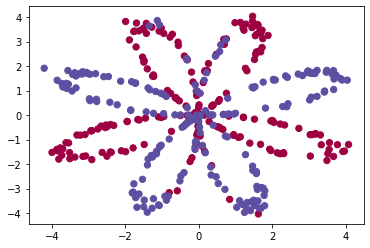

In [3]:
# import data
X, Y = load_planar_dataset()

plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0, :].shape), s=40, cmap=plt.cm.Spectral)

In [8]:
# 查看数据
x_shape = X.shape

y_shape = Y.shape
type(x_shape)
print("The shape of X:"+str(x_shape))
print("The shape of Y:"+str(y_shape))

The shape of X:(2, 400)
The shape of Y:(1, 400)


## 3 logistic regression

In [10]:
# 定义logistic回归
LR = sklearn.linear_model.LogisticRegressionCV()
LR.fit(X.T, Y.T)

c:\Users\CHENCHEN\.conda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression : 47% (percentage of correctly labelled datapoints)


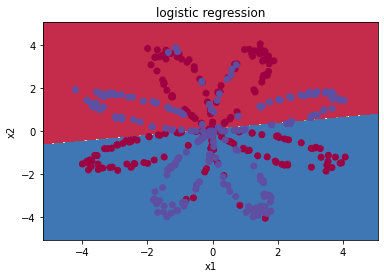

In [12]:
# 绘制logistic的决策边界
plot_decision_boundary(lambda x: LR.predict(x), X, Y)
plt.title("logistic regression")
# Print Accuracy
LR_predictions = LR.predict(X.T)
print('Accuracy of logistic regression : %d' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 4 神经网络模型

In [14]:
# 
def layer_size(x, y):
    n_x = x.shape[0]
    n_h = 4
    n_y = y.shape[0]
    return (n_x, n_h, n_y)

In [31]:
# 随机初始化参数
def initialize_parameters(n_x, n_h, n_y):
    # 设置随机种子
    np.random.seed(2)
    # 初始化模型参数
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))

    parameters = {
        "W1": w1,
        "b1": b1,
        "W2": w2,
        "b2": b2
    }
    return parameters


In [33]:
# 测试一下随机初始化方法
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("w1 = "+str(parameters["W1"]))
print("b1 = "+str(parameters["b1"]))
print("w2 = "+str(parameters["W2"]))
print("b2 = "+str(parameters["b2"]))


w1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
w2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [34]:
# 实现前向传播
def forward_propagation(x, parameters):
    w1 = parameters['W1']
    b1 = parameters['b1']
    w2 = parameters['W2']
    b2 = parameters['b2']

    # 计算前向传播过程
    Z1 = np.dot(w1, x)
    A1 = np.tanh(Z1)
    Z2 = np.tanh(A1)
    A2 = np.tanh(Z2)
    
    # 将计算结果放入dict中
    compution = {

        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }

    return A2, compution

In [35]:
#  测试一项上述前向传播函数
x_test, parameters = forward_propagation_test_case()
a2, computation = forward_propagation(x_test, parameters)
print(np.mean(computation["Z1"]), np.mean(computation["A1"]), np.mean(computation["Z2"]), np.mean(computation["A2"]))



-0.0004997557777419913 -0.0004969633532317802 -0.0004941807908604004 -0.0004914080427608731


In [36]:
# 计算成本函数
def compute_cost(A2, Y, parameters):
    # 获取样本数量
    m = Y.shape[1]
    # 计算损失函数
    logprobs = Y*np.log(A2) + (1 - Y)*np.log(1-A2)
    cost = -1/m * np.sum(logprobs)
    # 去除数组中shape为1的维度
    np.squeeze(cost)
    return cost

In [37]:
A2, Y_test, parameters = compute_cost_test_case()
print("cost = "+ str(compute_cost(A2, Y_test, parameters)))

cost = 0.6929198937761265


In [38]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = 1 / m * np.dot(dZ2,A1.T)
    db2 = 1 / m * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1 / m * np.dot(dZ1,X.T)
    db1 = 1 / m * np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [39]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]
